# Regression Models


In this notebook, we will describe regression models in Python (V.3.7). We will start with **Linear regression**. Linear regression makes prediction by simply computing a weighted sum of the input features, plus a constant called a *bias*, otherwise known as the intercept. Predictions for this model are made using the vector equation which is defined by:

$$
\hat{y} = \theta_{0} + \theta_{1}x_{1} + \dots + \theta_{n}x_{n} \;\;\;\;\;\;\; \text {for } i=1, \dots , n 
$$

In this equation we have variables that of:
- $\hat{y}$ is the predicted value of given model.
- $n$ is the number of features that go into the model.
- $x_i$ is the $i$-th feature that the model is using.
- $\theta_{j}$ is the $j$-th model parameter, where $\theta_{0}$ is the bias term and $\theta_{1}, \dots, \theta_{n}$ are the feature weights.

If we allow for the function for $i = 1, \dots, n$ we can obtain these :

$$
y_1 = \beta_0 + \beta_1x_1 + \epsilon_1 \\
y_2 = \beta_0 + \beta_1x_2 + \epsilon_2 \\
\vdots\\
y_n = \beta_0 + \beta_1x_n + \epsilon_n \\
$$

The above equation can also be written:
$$\hat{y} = h_{\theta}({x}) = \theta \cdot x
$$

This is our predictor function, but how do we choose the weights and bias? We will coose the weights and bias by minimizing the *Mean Squared Error* (MSE):

$$
\text{MSE}(x,h_{\theta}) = \frac{1}{m}\sum_{i = 1}^{m}({\theta^{T}x^{(i)} - y^{(i)}})^2
$$

Here $X$ is the training set of feature vectors.

## Normal Equation
For linear regression, there exist a closed form solution of the normal equation that minimizes the MSE. This eqauation is of the Normal Equation:

$$
\hat{\theta} = (X^{T}X)^{-1}X^{T}y
$$

In this equation we have variables that of:
- $\hat{\theta}$ is the value of $\theta$ that minimizes the cost of the fucntion. The hypothesis perameters that best defines the given data. 
- $X$ Input feature value of each instance.
- $Y$ Output value of each instance.
___

Below, we generate random data that is representive of a linear format to apply the normal function onto.

In [1]:
#import python packages 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [2]:
#create and X an y fucntion. The X will be random numbers while y will be values that are a funciton of the values in X
X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.rand(100,1)

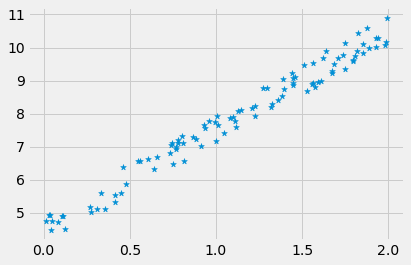

In [6]:
#plot the artifical data of the X and Y
plt.scatter(X,y, marker= "*")

___
In the artifical data of X and y, we can see a linear shape of the data is formed. This is a good start for our ability to use the normal fucntion to create a linear line for the data. 

Below, we apply the normal fucnction using matrix dot product of the X and y data. 
___

In [7]:
# solve the normal equation with matrix multiplication and dot. 

X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [8]:
#Make Predictor function using the created values after the normal equation is formed 
def y_hat(theta, x):
    return x*theta[1] + theta[0]

In [9]:
#apply the funciton for all te points in the data to get a regression value 
Y_predict = [y_hat(theta_best, x) for x in X]

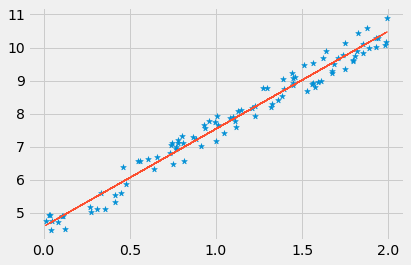

In [10]:
plt.scatter(X,y, marker= "*")
plt.plot(X,Y_predict, color = "C1", linewidth = 1)

___

# Using SciKit learn

Using Scikit learn makes linear regression model predictor easier than using the normal equations. Scikit Learn(Version 0.23.2) is a machine leanring library that is used for various tools such as classification, regression, and clustering. Various tools such as Support Vector Machines, Random forest, K-Means and Linear Regression. Today, we can use the linear model import with the Linear Regression model to create the same output that is seen before. 
___

In [9]:
#Import SKlearn package for linear regression 
from sklearn.linear_model import LinearRegression

In [12]:
#Create a linear funciton that we can fit and predit our models off of
lin_reg = LinearRegression()

lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
lin_reg.intercept_

array([4.57720144])

In [14]:
lin_reg.coef_

array([[2.95858517]])

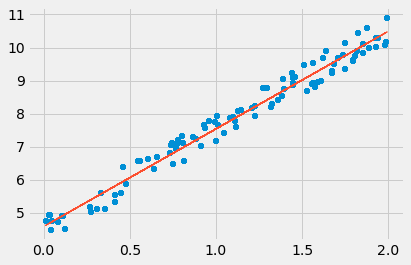

In [15]:
plt.scatter(X,y, marker = "+")
plt.plot(X, [x * lin_reg.coef_[0] + lin_reg.intercept_[0] for x in X], color = 'C1', linewidth = 1)

___
Above we see a linear regression line that is similar to the nornmal equation. This is expected as we are finding the regression of the data. 

Below, we can apply both regression lines into one plot to see the diffrence. And we do not see any change in the regression line between both methods of attempting this linear regression model. 
___

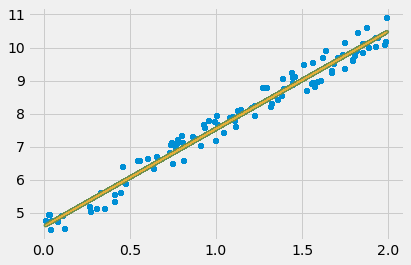

In [16]:
plt.scatter(X,y, marker = "+")
plt.plot(X, [x * lin_reg.coef_[0] + lin_reg.intercept_[0] for x in X], color = 'C3', linewidth = 4)
plt.plot(X,Y_predict, color = "C2", linewidth = 1)

## Solving Linear Regression using Gradient descent 

Gradient descent is a optimization algorthim that is often used to optomize the cost function. We get this optimization with the use of derivatives to get the minimum or the zero. To learn more of how to use gradient descent and the cost function, [here](https://github.com/HBrianLe/Data_4319/blob/master/Gradient%20Descent/Gradient%20Descent.ipynb) at a notebook that was build in Julia for Gradient Descent. 

### Batch Gradeint Descent
In batch gradeint descent, the partial derivative is found for each of the data point that is within the X variable. This is achieved by the finding the partial derivative of this cost funciton:

$$
\frac{\partial}{\partial \theta_j} \text{MES}(\theta) = \frac{2}{m} \sum_{i = 1}^m (\theta^Tx^{(i)}- y^{(i)}) x_j^{(i)}
$$

The above funciton definds the derivative for each point individually. The funciton below can be used to defind the partical for all the points at once. The Gradient Vector of $\nabla_\theta\text{MSE}(\theta)$ can be used for all the partial derivatives for all the data points at once. The function of the gradient vector is defined as:

$$
\nabla_\theta\text{MSE}(\theta) = 
\left(\begin{array}{cc} 
\frac{\partial}{\partial \theta_0} \text{MES}(\theta)\\
\frac{\partial}{\partial \theta_1} \text{MES}(\theta)\\
\vdots \\
\frac{\partial}{\partial \theta_n} \text{MES}(\theta)\\
\end{array}\right)
=
\frac{2}{m}X^{T}(X\theta- y)
$$

We are able to update the gradient using this following function:

$$
\theta^{k+1} = \theta^k - \eta\nabla_\theta\text{MSE}(\theta)
$$

In this equation we have variables that of:
- $\theta$ is the value of updated gradient vector. The use of $\theta^{k+1}$ is defining the next following update gradient vector.
- $\eta$ is the learning rate of the gradient function.This value is important to understand how it will affect our model. A $\eta$ that is too low will take too long to get a solution. A $\eta$ that is too high will take too long to get a solution. 


Batch Gradient Descent is often slow very slow when it comes to larger datasets and dealing with the size of the matrix that we find the gradient of. But where this method of gradient descent works well is in the size of the features that are used to input for the batch. 

In [17]:
eta = .005
n_iteration = 2000
n =100

theta_values = []
theta = np.random.rand(2,1)
theta_values.append(theta)

for _ in range(n_iteration):
    gradient = 2/n * X_b.T @ (X_b @ (theta)- y)
    theta = theta - eta*gradient
    if _ % 100 == 0:
        theta_values.append(theta)

In [18]:
len(theta_values)

21

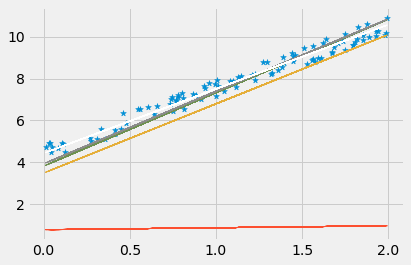

In [19]:
plt.scatter(X,y, marker = "*")
plt.plot(X, [x*theta_values[1][1] + theta_values[1][0] for x in X], color = "C1", linewidth = 1)
plt.plot(X, [x*theta_values[2][1] + theta_values[2][0] for x in X], color = "C2", linewidth = 1)
plt.plot(X, [x*theta_values[3][1] + theta_values[3][0] for x in X], color = "C3", linewidth = 1)
plt.plot(X, [x*theta_values[4][1] + theta_values[4][0] for x in X], color = "C4", linewidth = 1)
plt.plot(X, [x*theta_values[15][1] + theta_values[15][0] for x in X], color = "white", linewidth = 1)

___
Above, we see the gradient model in action. We can see that the **red** line is the intial start of the regression line. After several updates to the gradient descent model, we can see that the lines start to converge onto the data points. At this point we can see that that model has found the linear line that fits the data using gradient descent. The see the **White** line to the the final model to converge our model to the final point.

___

We can compare all 3 models below and how well they preform at creating the regression line that fits our data. AS we can see, all 3 models converge to the nearly the same positon of regression. There is some offset in eahc model as each can produce their own errors such as rounding or the amount of data used for the final result. 

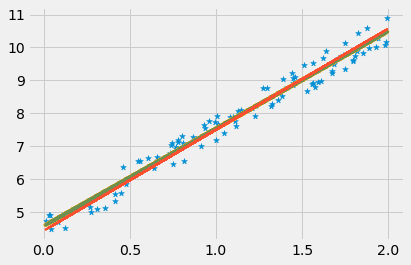

In [20]:
plt.scatter(X,y, marker = "*")
plt.plot(X,Y_predict, color = "C2", linewidth = 4)
plt.plot(X, [x * lin_reg.coef_[0] + lin_reg.intercept_[0] for x in X], color = 'C3', linewidth = 3)
plt.plot(X, [x*theta_values[15][1] + theta_values[15][0] for x in X], color = "C1", linewidth = 2)

___
## Polynomical Regression

If the data given is not a linear line or shape, we can use diffrent models such as Polynomical regression. We can model outr regression line to a $n^{th}$ degree polynomical. 

 
\begin{bmatrix}
1 & 2 & 3\\
a & b & c
\end{bmatrix}


In [21]:
m = 100
X = 6 * np.random.rand(m,1)-3
y = .5 * X**2 + X + 2 + np.random.rand(m,1)

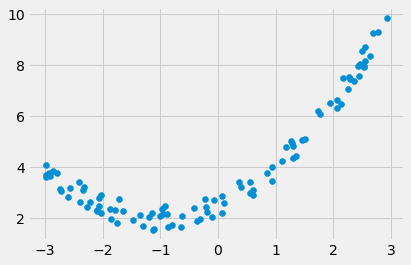

In [22]:
plt.scatter(X,y)

In [23]:
from sklearn.preprocessing import PolynomialFeatures
plot_features = PolynomialFeatures(degree= 2, include_bias= False)


#dot fit transform is create the first part of the matrix. Outputs 3 columns 
X_poly = plot_features.fit_transform(X)

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

def poly_predict(x):
    return x**2*lin_reg.coef_[0][1] + x*lin_reg.coef_[0][0] + lin_reg.intercept_[0]

In [25]:
lin_reg.coef_[0]

array([1.02781646, 0.49439332])

In [26]:
lin_reg.intercept_[0]

2.492296742493645

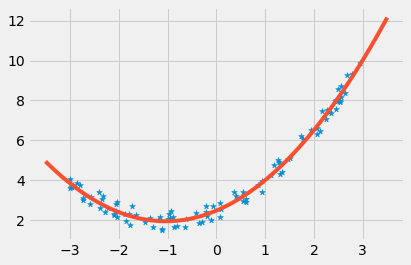

In [27]:
plt.scatter(X,y, marker = "*")
domain = np.linspace(-3.5,3.5,100)
plt.plot(domain, poly_predict(domain), color = 'C1')

# Ridge Regression and Lasso Regression 

We have the seen the basic linear regression of using MSE and the Normal Equation of use of just basic linear models. Now we will look at the use of two more methods of regression but with the use of weights adjustments and modifications along with the use of MSE. For linear modeling, we can constraining the weights of the model to produce coefficient estimates are constrained to zero. Using these types of models will allow us the prevention of issues such as overfitting and making models more complex. 

The first method of this we will be look at today is of Ridge Regression. 

### Ridge Regression
For ridge regression we must first apply the least squares error that will give us the best line that minimizes all the errors for data points (like what we have done above). In training models for linear regression, we tend to use training and testing data and we overfit for the training data resulting in the large and high variance of the test data. For this, we may want to not use the best fit line for training data but include a bias or not the best fit for the testing data. This overall will result in a drop in the variance of our test data that will not only create better models for the testing data but for future predictions and models that the data has yet seen.

For linear regression, the line minimizes the normal least squared residuals, but for Ridge Regression we minimize the least squared residuals + the $\lambda$ * $slope^2$, resulting in this equation as seen:
$$ \text{R}(\theta) = \text{MSE}(\theta) + \lambda*  \sum_{i = 1}^n \theta_i^2$$

In the following equation above, we can see that:
- $\theta$: The cost function or the bias value that should be added on to the eqaution
- $\lambda$: The hyperparameter that controls how much the $\theta$ value is applied as a weight to our equation.

The value of $\lambda$, determines how much of a bias we will add to our model. If this value is large, our model then all our weights will be large and present a flat horizontal line that is close to just the mean of the given data. 

Note: In the use of Ridge Regression the value of of bias will not reach zero for our model. This will never be a horizontal line and will always be offest by a little. When we look at Lasso Regression this will be an impact. 

As a result, we change the produced model to have a less of an impact when data is added to our model reducing and minimizing our value of varaiance and bias of the testing data. 
____
### Lasso Regression
For lasso regression, we have the same concept from Ridge Regression but the formula features a change to how the extra bias is calculated. The following equation is shown to see the changes in lasso:

$$ \text{R}(\theta) = \text{MSE}(\theta) + \lambda*  \sum_{i = 1}^n |\theta_i|$$

In the following equation above, we can see that:
- $\theta$: The cost function or the bias value that should be added on to the eqaution
- $\lambda$: The hyperparameter that controls how much the $\theta$ value is applied as a weight to our equation.

But what we see different is the application of the absolute value function that is added on to our $\theta$ rather than a squared that of in Ridge. This will result in a similar regression line as ridge regression but it allows it to get the zero parameter that is listed. For instance, if we have n amount of perameters, in the process of lasso, the model will return a model with less coefficients removing features. 

With the use of these types of regression, we are able to work with large datasets with many features and removing them from our model compared to normal linear regression. 



___

Below, we can apply these two functions to a dataset to see the produce models. 

Below, we have just a normal housing dataset that we have below. These are just houses around the United States with their listings. The dataset contains the following columns: 

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house


Today, we will use this dataset and three linear regression models to best produce a model that fits the dataset
___

In [5]:
#first we will import out packages needed for this part of the project, this includes regression models and metric valdation.
from sklearn.linear_model import Ridge, Lasso 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [6]:
#load the dataset in and select out the needed data for each the features and labels
USAhousing = pd.read_csv("USA_Housing.csv")
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']
USAhousing

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


___
As we see in the dataframe above, we have 7 features with one being labels. For this model, we selected out labels to be the price. There is one feature that we can not use and that is of the Address as that is text that does not fit our model
___

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

___
Below, we look at which model preforms the best at reducing the errors. here, we have the normal Linear regerssion (Multiple Linear regression), Ridge Regression and, Lasso Regression. Each one will take in the same data and we will look at the output errors of each in the MSE after. 
___

In [11]:
#we set functions to our 3 models
ridge_reg = Ridge(alpha= 1, solver= "lsqr")
lasso_reg = Lasso(alpha = .1)
linear_reg = LinearRegression()

In [12]:
#fit all 3 models with the data and set the predict dataset to each. 
linear_reg.fit(X_train, y_train)
ridge_reg.fit(X_train,y_train)
lasso_reg.fit(X_train, y_train)

lin = linear_reg.predict(X_test)
rid = ridge_reg.predict(X_test)
las = lasso_reg.predict(X_test)


In [13]:
#get the MSE for each model to see the results
print('MSE Linear:', metrics.mean_squared_error(y_test, lin))
print('MSE Ridge:', metrics.mean_squared_error(y_test, rid))
print('MSE Lasso:', metrics.mean_squared_error(y_test, las))

MSE Linear: 10180300530.30656
MSE Ridge: 52756463618.25394
MSE Lasso: 10180301445.57885


As we see above the errors of the data and each model. These are very large errors as it is the result of multiple features in our data. We can see that the Lasso preforms the best as it produces the lowest error. The linear function comes in second here as it is to near to the errors produced in Lasso. 

Although we can see the diffrence, each model preforms well in different conditions and that we must try many models to see which preforms the best and what we should use. 
___

In conclusion, Regression can be handled and approched in many ways. Form using hand fucntions such as the normal equation to using packages, they each produce simlar results. When the data reaches and gets to the point, we should change our model to use something else such as polynomial regression or the use of Ridge and Lasso Regression. 